# Pandas + ML — Part 3
End-to-end mini project:
- Load cleaned Iris data
- Train/test split
- Simple ML model (Logistic Regression)
- Evaluate with accuracy & confusion matrix
- Show feature importance coefficients


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

CSV_PATH = "ml_projects/data/iris_cleaned_engineered.csv"  # produced in part 2
df = pd.read_csv(CSV_PATH)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_index,species,sepal_area,petal_area
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa,0.008098,-1.174041
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa,-0.932024,-1.174041
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa,-0.830551,-1.178299
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa,-1.063343,-1.169783
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa,0.052866,-1.174041


In [2]:
# Features and target
X = df.drop(columns=['species','species_index'])
y = df['species']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
X.head()

Feature shape: (150, 6)
Target shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_area,petal_area
0,-0.900681,1.019004,-1.340227,-1.315444,0.008098,-1.174041
1,-1.143017,-0.131979,-1.340227,-1.315444,-0.932024,-1.174041
2,-1.385353,0.328414,-1.397064,-1.315444,-0.830551,-1.178299
3,-1.506521,0.098217,-1.283389,-1.315444,-1.063343,-1.169783
4,-1.021849,1.249201,-1.340227,-1.315444,0.052866,-1.174041


In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (105, 6) Test size: (45, 6)


In [4]:
# Train logistic regression (multi-class, simple baseline)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9111111111111111


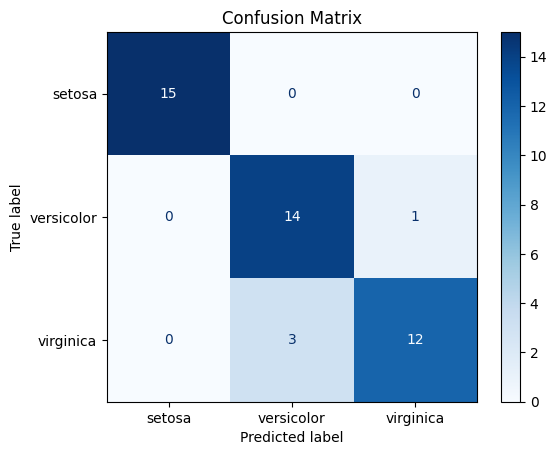

In [5]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [6]:
# Coefficients (feature importance for logistic regression)
coef_df = pd.DataFrame(model.coef_, columns=X.columns, index=model.classes_)
coef_df.T

,setosa,versicolor,virginica
sepal length (cm),-0.906444,0.439023,0.467422
sepal width (cm),0.918435,-0.376690,-0.541745
petal length (cm),-1.410913,0.218500,1.192413
petal width (cm),-1.327286,-0.181839,1.509124
sepal_area,-0.007481,0.053805,-0.046324
petal_area,-0.974873,-0.938755,1.913628


## Next steps
- Try other models: DecisionTreeClassifier, RandomForestClassifier
- Add cross-validation
- Compare models with accuracy and F1-score
- Export trained model with joblib
